In [ ]:
%%shell
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff

--2022-02-09 02:15:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117224 (114K) [application/x-httpd-php]
Saving to: ‘messidor_features.arff.1’

messidor_features.a 100%[===================>] 114.48K   747KB/s    in 0.2s    

2022-02-09 02:15:06 (747 KB/s) - ‘messidor_features.arff.1’ saved [117224/117224]



In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [ ]:
def dr_load(file_path) -> pd.DataFrame:
    col_names = ['quality assesment', 'retinal abnormality',
                 'MAs @ confidence level 0.5', 'MAs @ confidence level 0.6',
                 'MAs @ confidence level 0.7', 'MAs @ confidence level 0.8',
                 'MAs @ confidence level 0.9', 'MAs @ confidence level 1.0',
                 'exudates 1', 'exudates 2', 'exudates 3', 'exudates 4',
                 'exudates 5', 'exudates 6', 'exudates 7', 'exudates 8',
                 'macula-optic disc distance', 'optic disc diameter',
                 'AM/FM', 'class']

    df = pd.read_csv(file_path, skiprows=24, names=col_names)

    # See https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set#
    # for a description of this dataset.
    assert len(col_names) == 20
    assert len(df) == 1151

    return df


def dr_show_stats(df):
    pass # TODO


def dr_clean(df):
    # There's no missing data in the diabetes dataset
    return df.dropna()

In [ ]:
# Load the dataset
diabetes_df = dr_load('messidor_features.arff')

In [ ]:
diabetes_df.head()

quality assesment  retinal abnormality  ...  AM/FM  class
0                  1                    1  ...      1      0
1                  1                    1  ...      0      0
2                  1                    1  ...      0      1
3                  1                    1  ...      0      0
4                  1                    1  ...      0      1

[5 rows x 20 columns]

In [ ]:
# Check how many null values are there in each of the columns of the dataset.
diabetes_df.isna().sum(axis=0)

quality assesment             0
retinal abnormality           0
MAs @ confidence level 0.5    0
MAs @ confidence level 0.6    0
MAs @ confidence level 0.7    0
MAs @ confidence level 0.8    0
MAs @ confidence level 0.9    0
MAs @ confidence level 1.0    0
exudates 1                    0
exudates 2                    0
exudates 3                    0
exudates 4                    0
exudates 5                    0
exudates 6                    0
exudates 7                    0
exudates 8                    0
macula-optic disc distance    0
optic disc diameter           0
AM/FM                         0
class                         0
dtype: int64

In [ ]:
# Getting the shape => (rows, cols) of the dataset
diabetes_df.shape

(1151, 20)

In [ ]:
# Doing Preprocessiong of Diabetes Dataset
diabetes_df.dtypes

quality assesment               int64
retinal abnormality             int64
MAs @ confidence level 0.5      int64
MAs @ confidence level 0.6      int64
MAs @ confidence level 0.7      int64
MAs @ confidence level 0.8      int64
MAs @ confidence level 0.9      int64
MAs @ confidence level 1.0      int64
exudates 1                    float64
exudates 2                    float64
exudates 3                    float64
exudates 4                    float64
exudates 5                    float64
exudates 6                    float64
exudates 7                    float64
exudates 8                    float64
macula-optic disc distance    float64
optic disc diameter           float64
AM/FM                           int64
class                           int64
dtype: object

In [ ]:
diabetes_df.describe().T

count       mean  ...        75%         max
quality assesment           1151.0   0.996525  ...   1.000000    1.000000
retinal abnormality         1151.0   0.918332  ...   1.000000    1.000000
MAs @ confidence level 0.5  1151.0  38.428323  ...  55.000000  151.000000
MAs @ confidence level 0.6  1151.0  36.909644  ...  53.000000  132.000000
MAs @ confidence level 0.7  1151.0  35.140747  ...  51.000000  120.000000
MAs @ confidence level 0.8  1151.0  32.297133  ...  48.000000  105.000000
MAs @ confidence level 0.9  1151.0  28.747176  ...  43.000000   97.000000
MAs @ confidence level 1.0  1151.0  21.151173  ...  32.000000   89.000000
exudates 1                  1151.0  64.096674  ...  87.804112  403.939108
exudates 2                  1151.0  23.088012  ...  31.305692  167.131427
exudates 3                  1151.0   8.704610  ...  11.766880  106.070092
exudates 4                  1151.0   1.836489  ...   1.921648   59.766121
exudates 5                  1151.0   0.560738  ...   0.191953   51.423208
exudates 6                  1151.0   0.212290  ...   0.038450   20.098605
exudates 7                  1151.0   0.085674  ...   0.004832    5.937799
exudates 8                  1151.0   0.037225  ...   0.003851    3.086753
macula-optic disc distance  1151.0   0.523212  ...   0.543670    0.592217
optic disc diameter         1151.0   0.108431  ...   0.119591    0.219199
AM/FM                       1151.0   0.336229  ...   1.000000    1.000000
class                       1151.0   0.530843  ...   1.000000    1.000000

[20 rows x 8 columns]

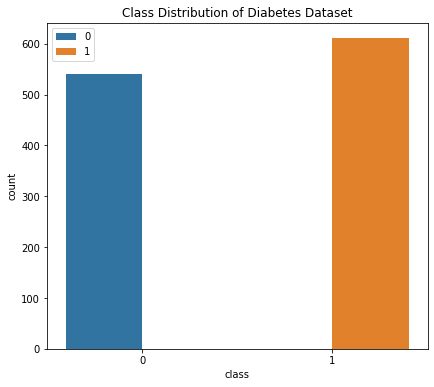

In [ ]:
# Class Distribution Plot
fig = plt.figure(figsize=(15,6))
plot = sns.countplot(x='class', data=diabetes_df, hue='class', ax = fig.add_subplot(1,2,1))
plot.set_title('Class Distribution of Diabetes Dataset')
plot.legend(loc = "upper left")

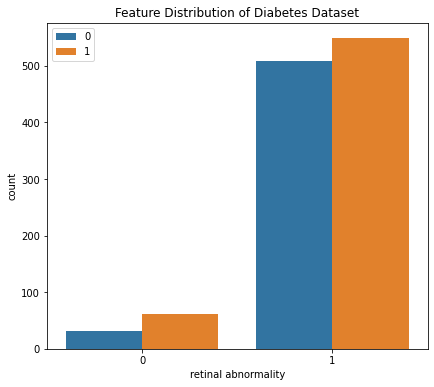

In [ ]:
fig = plt.figure(figsize=(15,6))
plot = sns.countplot(x='retinal abnormality', data=diabetes_df, hue='class', ax = fig.add_subplot(1,2,1))
plot.set_title('Feature Distribution of Diabetes Dataset')
plot.legend(loc = "upper left")

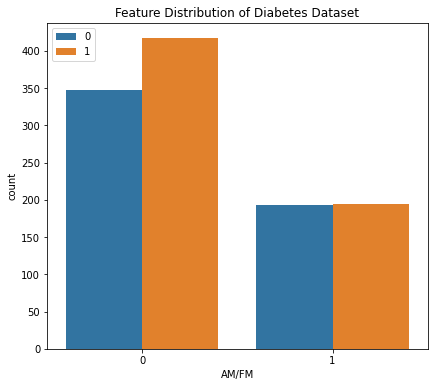

In [ ]:
fig = plt.figure(figsize=(15,6))
plot = sns.countplot(x='AM/FM', data=diabetes_df, hue='class', ax = fig.add_subplot(1,2,1))
plot.set_title('Feature Distribution of Diabetes Dataset')
plot.legend(loc = "upper left")

[Text(1, 0.5, 'exudates 4'),
 Text(1, 1.5, 'exudates 7'),
 Text(1, 2.5, 'exudates 8'),
 Text(1, 3.5, 'exudates 5'),
 Text(1, 4.5, 'exudates 6'),
 Text(1, 5.5, 'AM/FM'),
 Text(1, 6.5, 'exudates 1'),
 Text(1, 7.5, 'exudates 2'),
 Text(1, 8.5, 'exudates 3'),
 Text(1, 9.5, 'quality assesment'),
 Text(1, 10.5, 'optic disc diameter'),
 Text(1, 11.5, 'class'),
 Text(1, 12.5, 'MAs @ confidence level 0.9'),
 Text(1, 13.5, 'MAs @ confidence level 1.0'),
 Text(1, 14.5, 'MAs @ confidence level 0.5'),
 Text(1, 15.5, 'MAs @ confidence level 0.6'),
 Text(1, 16.5, 'MAs @ confidence level 0.7'),
 Text(1, 17.5, 'MAs @ confidence level 0.8'),
 Text(1, 18.5, 'retinal abnormality'),
 Text(1, 19.5, 'macula-optic disc distance')]

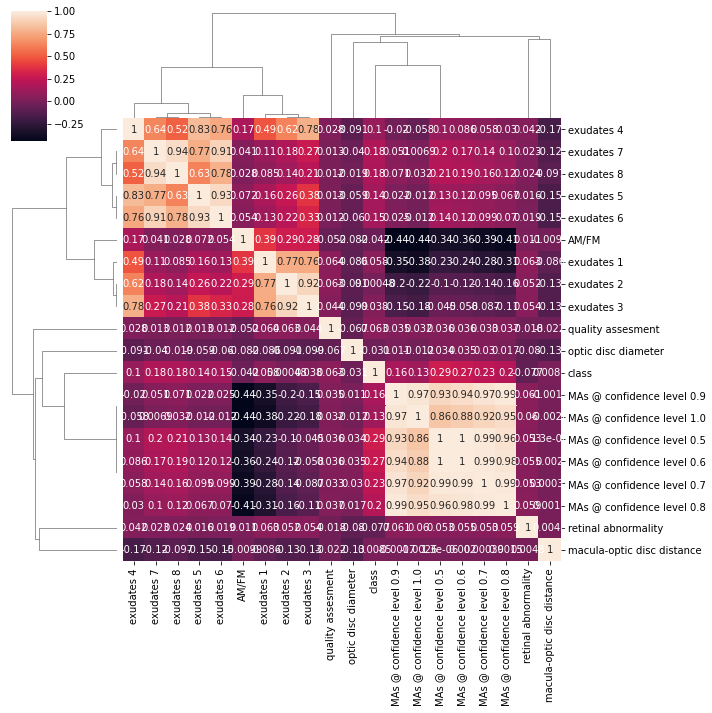

In [ ]:
#correlation between data
diabetes_data_corr = diabetes_df.corr()
plot_corr = sns.clustermap(data = diabetes_data_corr,
                           metric="correlation",
                           annot=True,
                           )
plot_corr.ax_heatmap.set_yticklabels(plot_corr.ax_heatmap.get_yticklabels(),
                                     rotation=0)

Text(0.5, 1.0, 'Correlation Heatmap Diabetes Dataset')

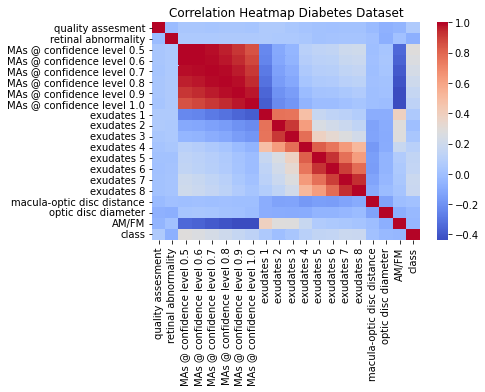

In [ ]:
# Another way of plotting heatmap
diabetes_df_corr = diabetes_df.corr()
plot_corr = sns.heatmap(diabetes_df_corr,
                        xticklabels=diabetes_df_corr.columns,
                        yticklabels=diabetes_df_corr.columns,
                        cmap='coolwarm')
plot_corr.set_title('Correlation Heatmap Diabetes Dataset') 

In [ ]:
# Reference - https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(diabetes_df, 5))

Top Absolute Correlations
MAs @ confidence level 0.5  MAs @ confidence level 0.6    0.996177
MAs @ confidence level 0.6  MAs @ confidence level 0.7    0.994221
MAs @ confidence level 0.7  MAs @ confidence level 0.8    0.991821
MAs @ confidence level 0.8  MAs @ confidence level 0.9    0.988294
MAs @ confidence level 0.5  MAs @ confidence level 0.7    0.985730
dtype: float64


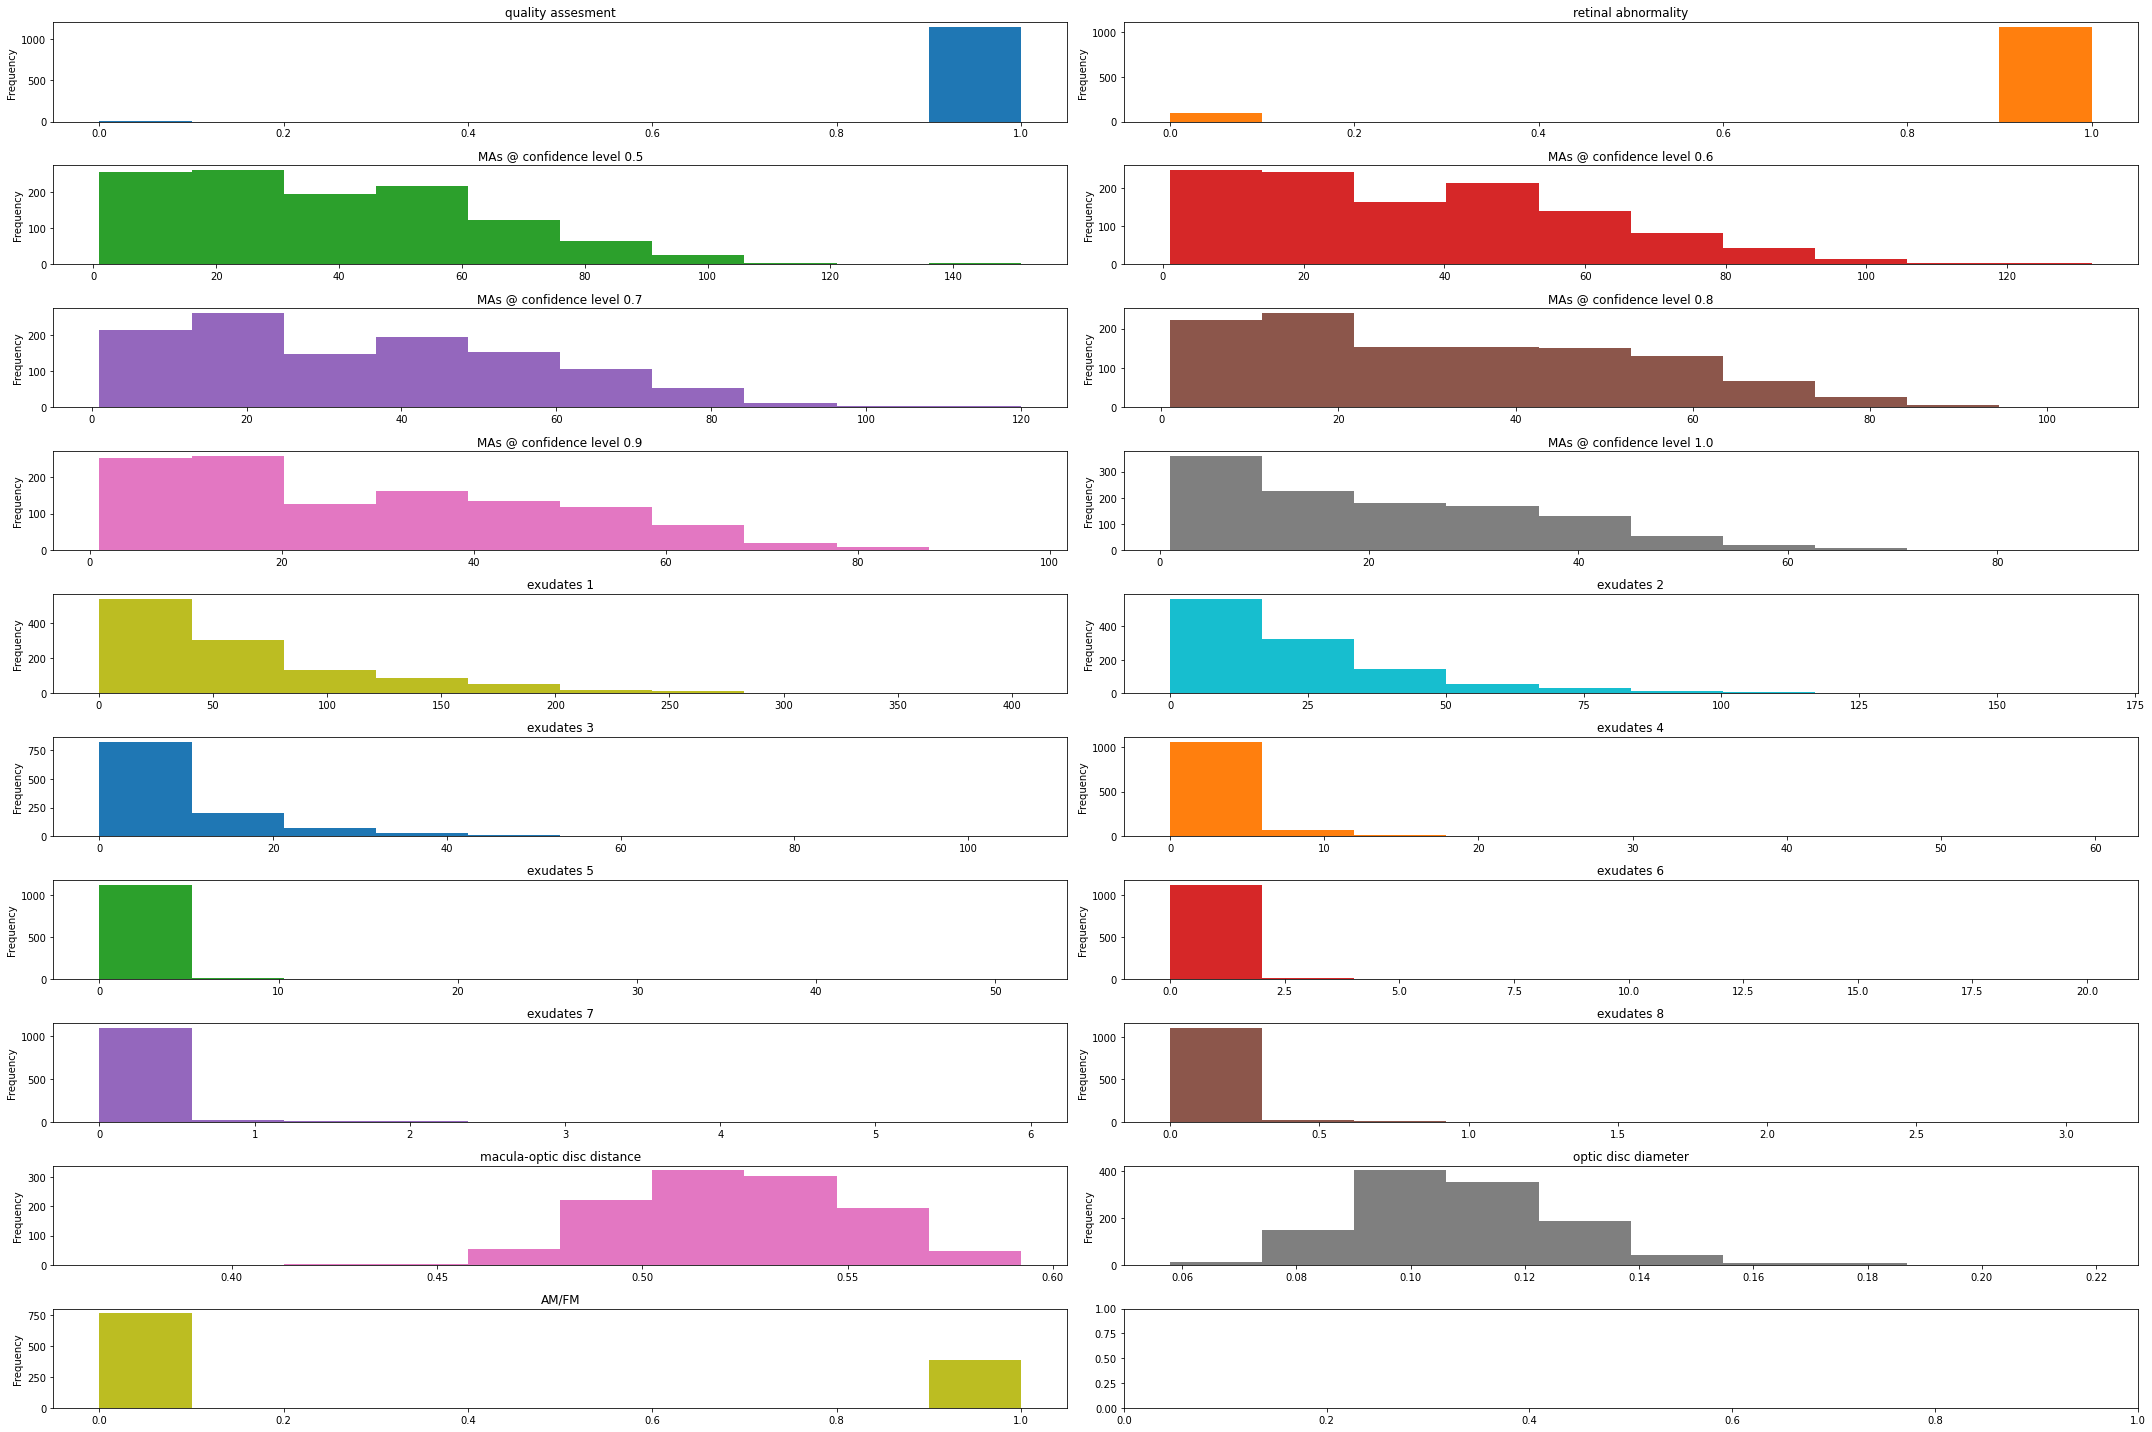

In [ ]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
fig, axes = plt.subplots(10,2, figsize=(30,20))
axes = axes.flatten()
ax_idx = 0
columns = diabetes_df.drop('class', axis = 1).columns
for col in columns:
    diabetes_df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1
plt.tight_layout()
plt.show()

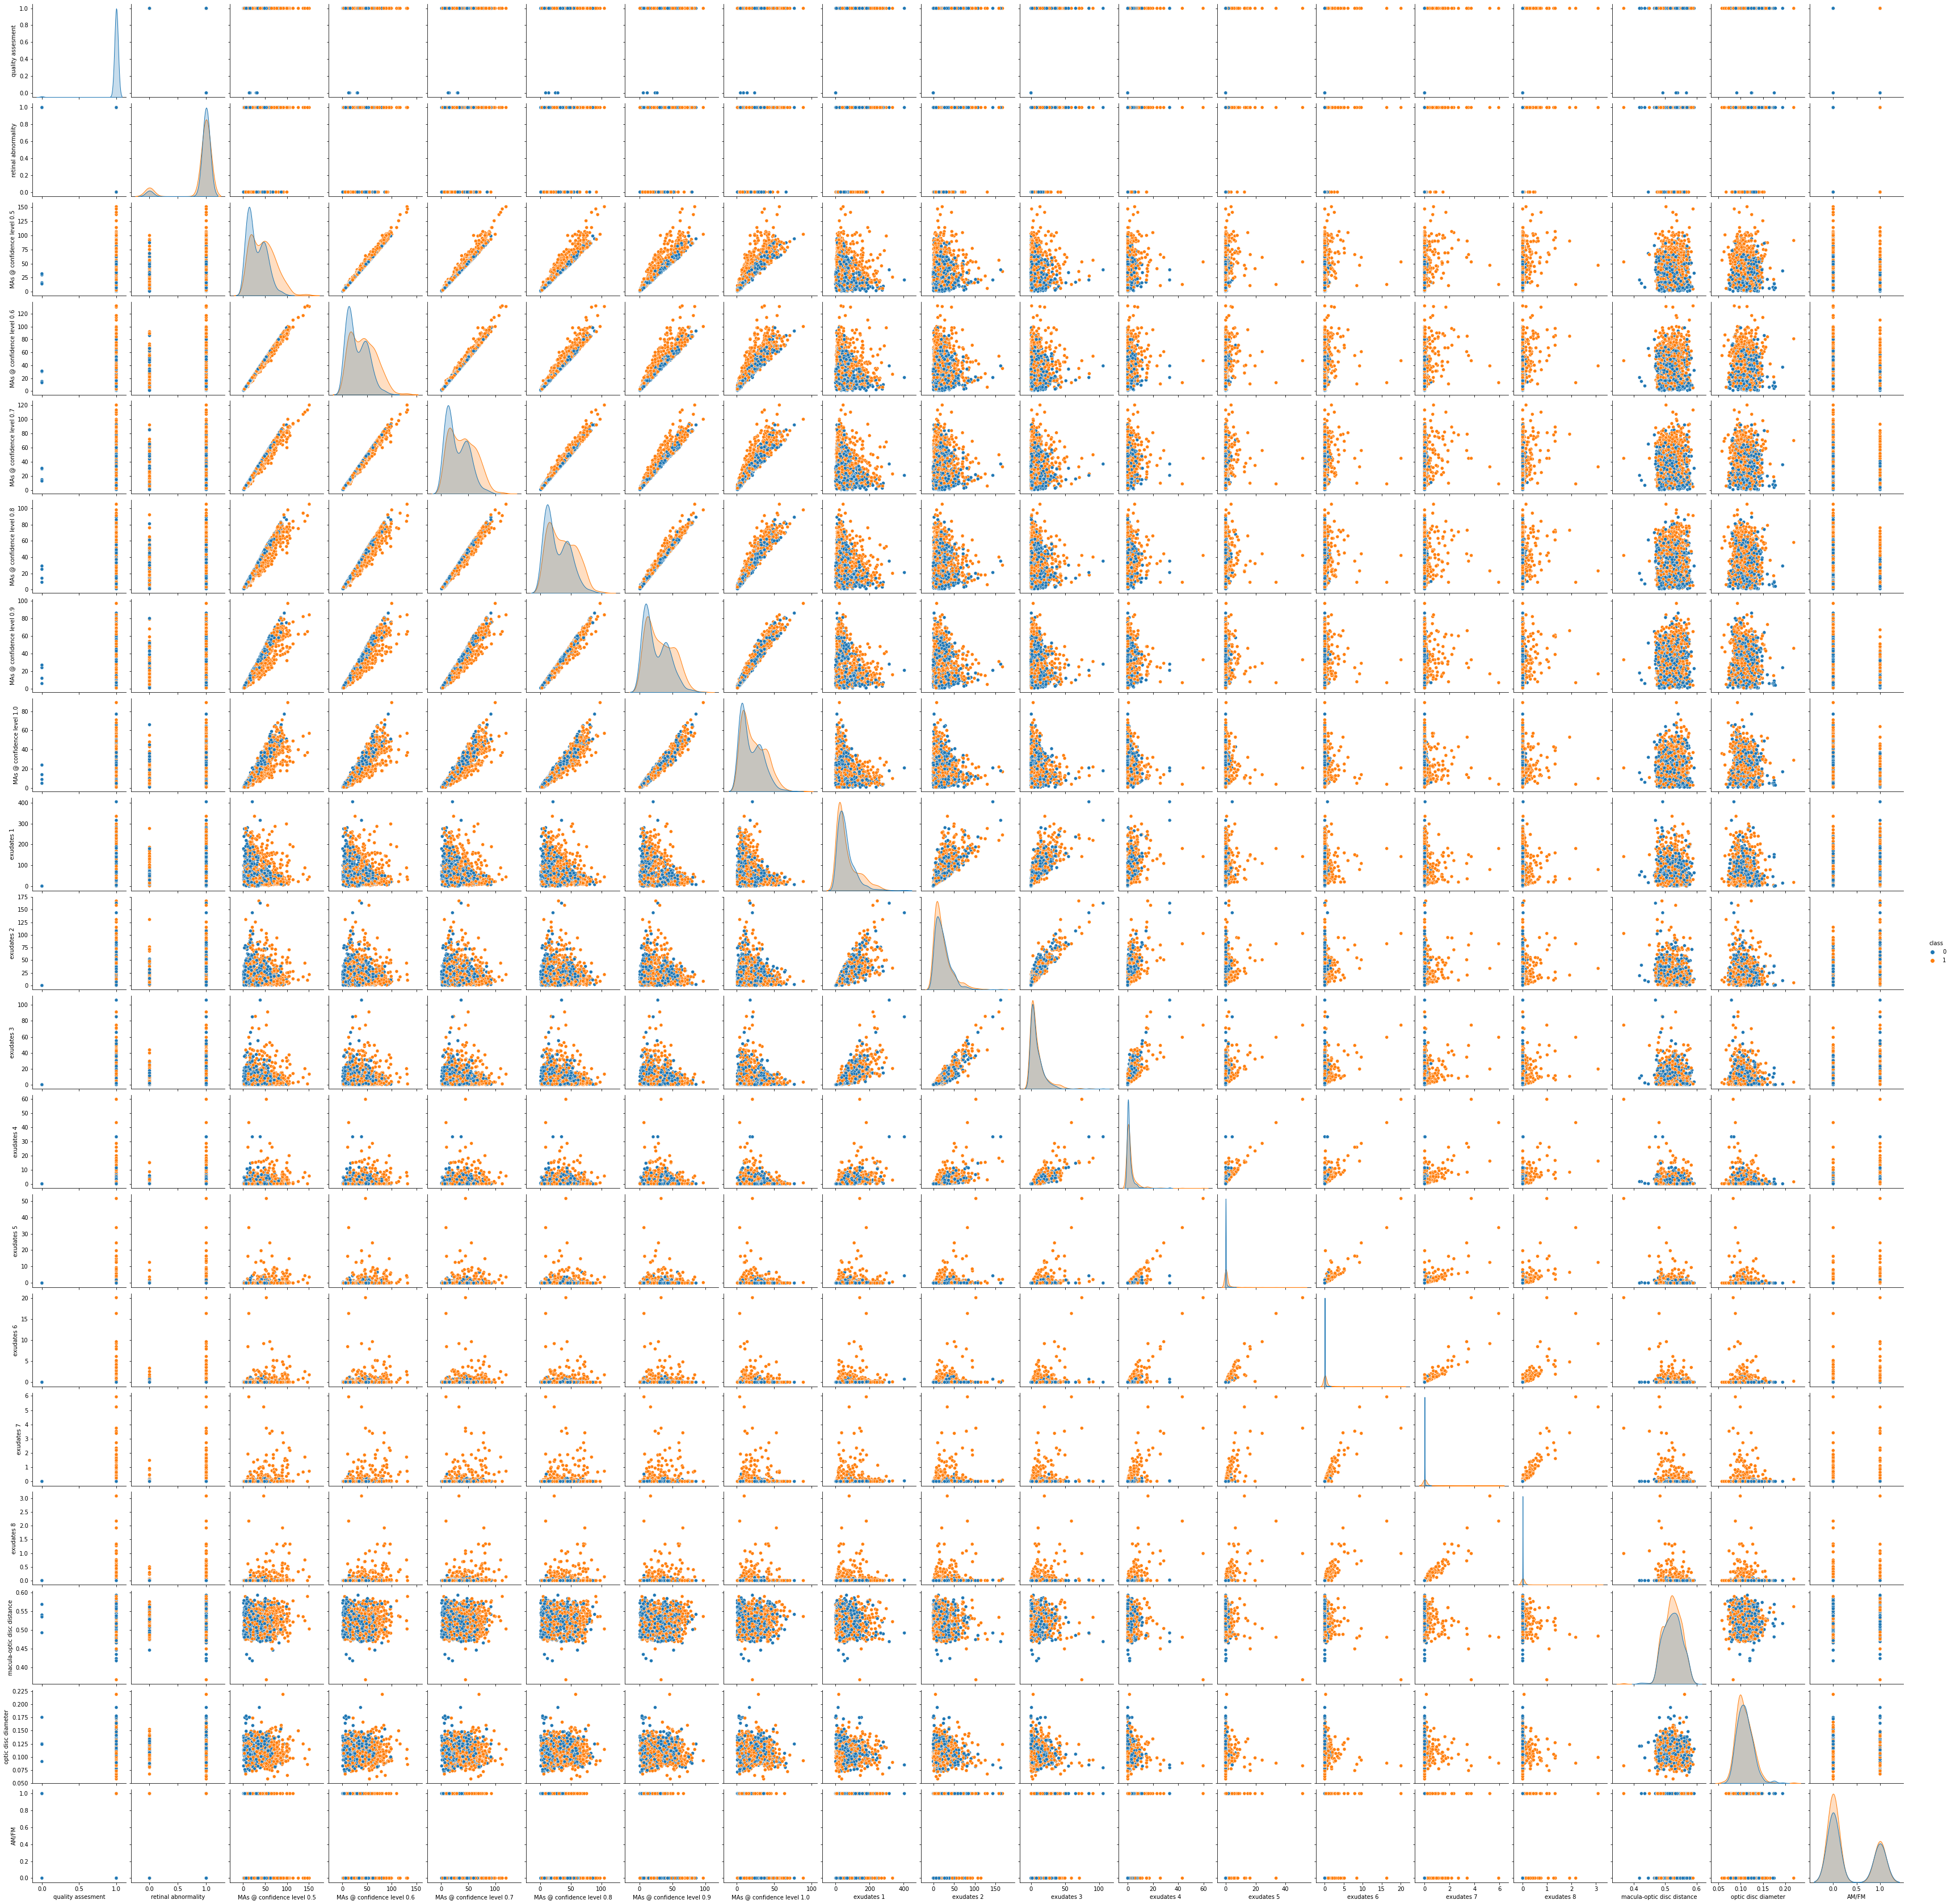

In [ ]:
sns.pairplot(diabetes_df, diag_kind='kde', hue="class")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


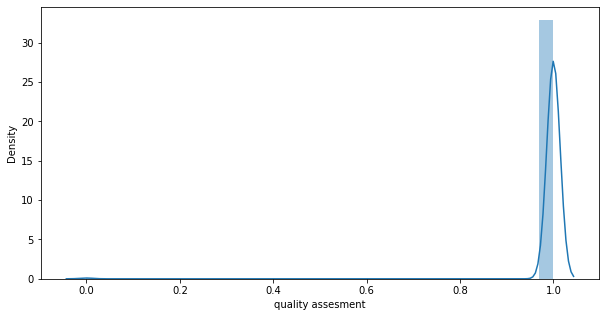

In [ ]:
#Density Plots
plt.figure(figsize = (10,5))
sns.distplot(diabetes_df['quality assesment'])

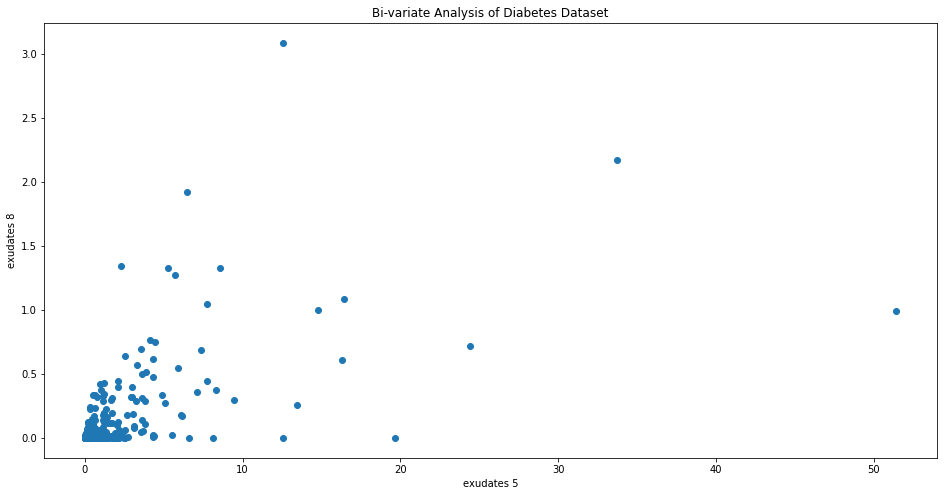

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(diabetes_df['exudates 5'], diabetes_df['exudates 8'])
ax.set_title('Bi-variate Analysis of Diabetes Dataset')
ax.set_xlabel('exudates 5')
ax.set_ylabel('exudates 8')
plt.show()

In [ ]:
# Z Score
from scipy import stats
z = np.abs(stats.zscore(diabetes_df))
print(z)

[[0.05905386 0.2982129  0.6414863  ... 0.46865568 1.40504812 1.06371118]
 [0.05905386 0.2982129  0.56339113 ... 2.00605415 0.7117194  1.06371118]
 [0.05905386 0.2982129  0.92041699 ... 1.1215164  0.7117194  0.94010481]
 ...
 [0.05905386 3.35330894 0.41279842 ... 1.19371332 0.7117194  1.06371118]
 [0.05905386 0.2982129  0.0223226  ... 0.09707846 1.40504812 0.94010481]
 [0.05905386 0.2982129  1.22720003 ... 1.08570243 0.7117194  1.06371118]]


In [ ]:
threshold = 8
print(np.where(z > 8))

# Don’t be confused by the results. 
# The first array contains the list of row numbers and second array respective column numbers, which mean z[106][14] have a Z-score higher than 3.

#Example

print(z[106][14])

(array([ 106,  106,  106,  125,  234,  234,  569,  673,  673,  694,  790,
        900,  977, 1037, 1037, 1037, 1037, 1037, 1055, 1055, 1055, 1066,
       1066, 1066, 1066]), array([13, 14, 15,  0, 14, 15,  0, 10, 11,  0, 11,  0, 14, 11, 12, 13, 14,
       15, 12, 13, 14, 11, 12, 13, 14]))
12.903815993966846


In [ ]:
diabetes_df_clean = diabetes_df[(z < 8).all(axis=1)]
print(diabetes_df.shape)
print(diabetes_df_clean.shape)

(1151, 20)
(1139, 20)


KNN

In [ ]:
# # Changelist: Added cross validation, fixed accuracy calculation. Not entirely sure about deicsion boundary 
# class KNN:
#     EUCLIDEAN = lambda x1, x2: np.sqrt(np.sum((x1 - x2) ** 2, axis=-1))
#     MANHATTEN = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

#     def __init__(self, K, dist_fn):
#         self.K = K
#         self.dist_fn = dist_fn

#         if dist_fn == KNN.EUCLIDEAN:    self.dist_fn_name = 'euclidean'
#         elif dist_fn == KNN.MANHATTEN:  self.dist_fn_name = 'manhatten'

#     def __str__(self):
#         return f'KNN model with K = {self.K} using {self.dist_fn_name} distance function'

#     def fit(self, X: np.ndarray, y: np.ndarray):
#         # Just store the data and class labels
#         self.X_train = X
#         self.y_train = y

#     def predict(self, X_test: np.ndarray) -> np.ndarray:

#         X_test = X_test
#         n_test = len(X_test)
#         '''
#         We want to find distance of every point in X_test of shape (n_test,n_features)
#         with every point in X_train of shape (n_train, n_features). To do this in one 
#         numpy operation, we pad X_test with a dummy axis so that its shape is 
#         (n_train, 1, n_features).
#         See https://stackoverflow.com/a/37903795/3613100 for a good explanation.
#         distances will be of shape (n_test, n_train) and will contain distance of each point
#         in X_test (axis 0) with each point in X_train (axis 1). 
#         '''
#         distances = self.dist_fn(X_test[:, np.newaxis, :], self.X_train)

#         '''
#         Initialize a matrix to store KNN's indices for each test datapoint. This will have shape 
#         (n_test, K). The i'th row will store indices of KNN's to the i'th test point. The 
#         indices refer to indices in self.X_train.
#         '''
#         knns_indices = np.zeros((n_test, self.K), dtype=int)

#         # i'th entry in y_pred will be the predicted class label of i'th test datapoint.
#         y_pred = np.zeros(n_test, dtype=int)

#         for i in range(n_test):
#             knns_indices[i, :] = np.argsort(distances[i])[:self.K]
#             knn_classes = self.y_train[knns_indices[i]]
#             vals, counts = np.unique(knn_classes, return_counts=True)
#             y_pred[i] = vals[np.argmax(counts)]

#         return y_pred

# def evaluate_acc(y_pred: np.ndarray, y_actual: np.ndarray) -> float:
#     # Returns accuracy %.
#     num_correct_labels = np.sum(y_pred == y_actual)
#     return (num_correct_labels / len(y_pred)) * 100.0


# def cross_validate(model, all_data: pd.DataFrame, L=3) -> float:
#     '''
#     Returns L-folds cross-validated accuracy %.
#     '''
#     total_size = len(all_data)
#     # It's possible for L to not be an exact multiple of total_size, but
#     # in such cases the number of dropped datapoints will be very small
#     # compared to total data points.
#     fold_size = total_size // L

#     # Extract labels as a separate array
#     labels = all_data['class']
#     # Remove labels from data array
#     all_data.drop('class', axis=1, inplace=True)
#     total_accuracy = 0.0

#     for l in range(L):
#         # Create empty dataframes to hold training set
#         training_data = pd.DataFrame(dtype='float64', columns=all_data.columns)
#         training_labels = pd.Series(dtype='int64')

#         validation_data = training_data = pd.DataFrame(dtype='float64', columns=all_data.columns)
#         validation_labels = pd.Series(dtype='int64')

#         current_fold = 0
#         current_start_index = 0
#         while current_fold < L:
#             end_index = current_start_index + fold_size
#             fold_data = all_data[current_start_index : end_index]
#             fold_labels = labels[current_start_index : end_index]
#             # print(f'Sliced from {current_start_index} to {end_index}')

#             if current_fold == l:
#                 # Hold out the l'th fold data for validation
#                 validation_data = fold_data
#                 validation_labels = fold_labels
#             else:
#                 # else add the (l-1) folds to training set
#                 training_data = training_data.append(fold_data)
#                 training_labels = training_labels.append(fold_labels)

#             current_fold += 1
#             current_start_index = end_index

#         # At this point we have the correct train and validation sets for the L'th run
#         model.fit(training_data.to_numpy(), training_labels.to_numpy())
#         y_pred = model.predict(validation_data.to_numpy())

#         accuracy = evaluate_acc(y_pred, validation_labels.to_numpy())
#         print(f'Accuracy for {model} for cross validation run {l} with folds size {fold_size} is {round(accuracy,2)}%.')
#         total_accuracy += accuracy

#     return total_accuracy / L


# def run_experiment(dataset, K, distance_fn):

#         if dataset == 'diabetes':
#             all_data = dr_load('messidor_features.arff')
#             dr_show_stats(all_data)
#             # No need to clean this as there are no missing values
        

#         else:   raise Exception('Wrong dataset name!')

#         # Everything below this is train and everything after is test
#         # Using a 60/40% split for train/test
#         split_index = int(len(all_data) * 0.7)

#         # Vanilla train/test KNN
        

        

#         # Vanilla train/test KNN
#         knn = KNN(K=K, dist_fn=distance_fn)
#         X_train = all_data[:split_index].drop('class', axis=1).to_numpy()
#         y_train = all_data['class'][:split_index].to_numpy()
#         knn.fit(X_train, y_train)

#         X_test = all_data[split_index:].drop('class', axis=1).to_numpy()
#         y_test = all_data['class'][split_index:].to_numpy()

#         y_pred = knn.predict(X_test)
#         accuracy = evaluate_acc(y_pred, y_test)
#         print(f'Accuracy of {knn} on {dataset} dataset is {round(accuracy, 2)}%.')
        

#         # Decision boundary
#         RESOLUTION = 500

#         # Discretize the feature space
#         NUM_FEATURES = X_test.shape[1]
#         discretized_features = []
#         for i in range(NUM_FEATURES):
#             discretized_features.append(
#                 np.linspace(np.min(X_test[:, i]), np.max(X_test[:, i]), RESOLUTION))
#         all_discretized = np.vstack(discretized_features).T

#         # feature1v = np.linspace(np.min(X_test[:, 2]), np.max(X_test[:, 2]), RESOLUTION)
#         # feature2v = np.linspace(np.min(X_test[:, 3]), np.max(X_test[:, 3]), RESOLUTION)
#         # discretized = np.vstack((feature1v.ravel(), feature2v.ravel())).T

#         x0, x1 = np.meshgrid(discretized_features[3], discretized_features[9])
#         x_all = np.vstack((x0.ravel(), x1.ravel())).T

#         discreized_predictions = knn.predict(all_discretized)

#         ##print(discreized_predictions)

#         BLUE = [0, 0, 1]
#         RED =  [1, 0, 0]

#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')
#         print(X_test[:, 3])
#         ax.scatter(X_test[:, 3], X_test[:, 9], y_test, c=y_test, cmap=plt.cm.coolwarm)
#         ax.scatter(X_test[:, 3], X_test[:, 9], y_pred, c=y_pred, cmap=plt.cm.coolwarm)
#         ax.set_xlabel('feature 3')
#         ax.set_ylabel('feature 9')
#         ax.set_zlabel('class')
#         plt.show()

#         # Choose a color scheme for the two classes
#         colors = np.array([RED, BLUE])
#         # Plot the points with colors according to their classes
#         plt.scatter(X_test[:, 3], X_test[:, 9], c=colors[y_test.astype(int)], s=40)
#         # Plot the predicted regions
#         plt.xlabel('feature1')
#         plt.ylabel('feature2')
#         plt.title('KNN Decision Boundary')
#         plt.show()

#         '''
#         sklearn comparison        
#         from sklearn.neighbors import KNeighborsClassifier
#         from sklearn.metrics import accuracy_score
#         knn = KNeighborsClassifier(n_neighbors = K)
#         knn.fit(X_train, y_train)
#         y_pred = knn.predict(X_test)
#         print('KNN Breast cancer Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#         '''

#         #  Cross validation
#         L = 3   # number of cross validation folds
#         Ks = [i for i in range(1, 20)]     # different values of K's to check for

#         best_model = None
#         best_validation_accuracy = -1.0
#         all_validation_accs = []
#         # np.random.seed(551)

#         for K in Ks:
#             # Get all the training data (training+validation sets)
#             training_data = all_data[:split_index].copy()

#             # Remaining data is for test set
#             testing_data = all_data[split_index:].drop('class', axis=1)
#             testing_labels = all_data['class'][split_index:]

#             knn = KNN(K=K, dist_fn=distance_fn)
#             # Run cross validation
#             cross_accuracy = cross_validate(knn, training_data, L=L)
#             print(f'Average {L} folds cross-validation accuracy '
#                   f'for {knn} is {round(cross_accuracy, 2)}%.')

#             all_validation_accs.append(cross_accuracy)
#             if cross_accuracy > best_validation_accuracy:
#                 best_validation_accuracy = cross_accuracy
#                 best_model = knn

#             # Run on test set
#             test_pred = knn.predict(testing_data.to_numpy())
#             test_acc = evaluate_acc(test_pred, testing_labels.to_numpy())
#             print(f'Testing accuracy for {knn} is {round(test_acc, 2)}%.')

#         print(f'{best_model} was found to be the best model with validation accuracy = '
#               f'{round(best_validation_accuracy,2)}%.')


#         plt.scatter(Ks, all_validation_accs)
#         plt.plot(Ks, all_validation_accs)
#         plt.xlabel('K')
#         plt.ylabel('validation accuracy %')
#         plt.show()
#         pass


# print('Diabetes dataset')
# run_experiment('diabetes', K=6, distance_fn=KNN.MANHATTEN)

##Decision Trees

###Helper Functions

In [ ]:
# def load_data(file_path, column_names) -> pd.DataFrame:
#     df = pd.read_csv(file_path, names=column_names)
#     return df

In [ ]:
# def clean_data(df) -> pd.DataFrame:
#     df = df.apply(pd.to_numeric, errors='coerce')
#     df = df.dropna()
#     return df

In [ ]:
# def train_test_split(df, train_percent, y_col):
#     msk = np.random.rand(len(df)) < train_percent
#     train = df[msk]
#     test = df[~msk]
#     x_train = train.loc[:, train.columns != y_col]
#     y_train = train.loc[:, train.columns == y_col]
#     x_test = test.loc[:, test.columns != y_col]
#     y_test = test.loc[:, test.columns == y_col]
#     return x_train.to_numpy(), y_train.to_numpy().ravel(), x_test.to_numpy(), y_test.to_numpy().ravel()

## Node and Tree Class

In [ ]:
# class Node:
#     def __init__(self, data_indices, parent):
#         self.data_indices = data_indices
#         self.left = None
#         self.right = None
#         self.split_feature = None
#         self.split_value = None
#         self.depth = 0
#         self.data = None
#         self.probability_of_each_class = None
#         if parent:
#             self.depth = parent.depth + 1

In [ ]:
# class DecisionTree:
#     def __init__(self, cost_function='misclassification', max_depth=3, min_leaf_instances=1):
#         self.max_depth = max_depth
#         self.root = None
#         if cost_function == 'misclassification':
#             self.cost_function = self.misclassification_cost
#         elif cost_function == 'entropy':
#             self.cost_function = self.entropy_cost
#         elif cost_function == 'gini':
#             self.cost_function = self.gini_index_cost
#         self.num_classes = None
#         self.min_leaf_instances = min_leaf_instances
#         self.data = None
#         self.labels = None


# def misclassification_cost(data_points):
#     return 1 - np.max(np.bincount(data_points) / np.sum(np.bincount(data_points)))


# def entropy_cost(data_points):
#     probability_of_each_class = np.bincount(data_points) / len(data_points)
#     probability_of_each_class = probability_of_each_class[probability_of_each_class > 0]
#     return -np.sum(probability_of_each_class * np.log(probability_of_each_class))


# def gini_index_cost(data_points):
#     probability_of_each_class = np.bincount(data_points) / len(data_points)
#     return 1 - np.sum(np.square(probability_of_each_class))

#     def split(self, node):
#         best_cost = np.inf
#         best_feature = None
#         best_test_value = None

#         # Sort the data points in ascending order
#         data = self.data[node.data_indices]
#         sorted_data = np.sort(data, axis=0)

#         number_of_instances = data.shape[0]
#         number_of_features = data.shape[1]

#         # Calculating average values of adjacent data points
#         candidates = (sorted_data[1:] + sorted_data[:-1]) / float(2)

#         # Calculate the best feature and a value from the feature
#         # to use for the branching
#         for feature in range(number_of_features):
#             feature_data_points = data[:, feature]
#             # Test for average values between each
#             # data points in the feature
#             for value in candidates[:, feature]:
#                 left_indices = node.data_indices[feature_data_points <= value]
#                 right_indices = node.data_indices[feature_data_points > value]

#                 # If a value causes either left or right sub array to be 0
#                 # then the best cost is inf
#                 if len(left_indices) == 0 or len(right_indices) == 0:
#                     continue

#                 # Calculate a weighted cost, using the given cost function
#                 left_cost = self.cost_function(self.labels[left_indices])
#                 right_cost = self.cost_function(self.labels[right_indices])
#                 cost = (left_indices.shape[0] * left_cost + right_indices.shape[0] * right_cost) / number_of_instances

#                 # Update the cost if there is a better cost
#                 if cost < best_cost:
#                     best_cost = cost
#                     best_feature = feature
#                     best_test_value = value

#         return best_cost, best_feature, best_test_value

#     def _fit_tree(self, node):
#         # Calculate the probability of reaching this node
#         probability_of_each_class = np.bincount(self.labels[node.data_indices], minlength=self.num_classes)
#         node.probability_of_each_class = probability_of_each_class / np.sum(probability_of_each_class)

#         # Stopping criteria
#         # (i) maximum depth
#         # (ii) minimum number of elements in the leaf nodes
#         # (iii) if entropy, calculate the improvement in the entropy
#         if node.depth == self.max_depth \
#                 or len(node.data_indices) <= self.min_leaf_instances:
#             return

#         # Get the optimal split for the data points associated with the node
#         cost, node.split_feature, node.split_value = self.split(node)

#         # If the optimal cost is inf, then there's nothing more to do
#         if np.isinf(cost):
#             return

#         # Get the data points towards the left and right of the split respectively
#         test = self.data[node.data_indices, node.split_feature] <= node.split_value
#         node.left = Node(node.data_indices[test], node)
#         node.right = Node(node.data_indices[np.logical_not(test)], node)

#         # Run the _fit_tree method recursively for the individual splits
#         self._fit_tree(node.left)
#         self._fit_tree(node.right)

#     def fit(self, data, labels):
#         self.data = data
#         self.labels = labels
#         self.num_classes = np.max(self.labels) + 1
#         self.root = Node(np.arange(data.shape[0]), None)
#         self._fit_tree(self.root)

#     def predict(self, test_data):
#         # Initialise the probabilities with 0
#         probability_of_each_class = np.zeros((test_data.shape[0], self.num_classes))
#         # For every data point in the test data
#         # follow the tree branching until you reach the leaf
#         # finally calculate the probability
#         for n, x in enumerate(test_data):
#             node = self.root
#             while node.left:
#                 if x[node.split_feature] <= node.split_value:
#                     node = node.left
#                 else:
#                     node = node.right
#             probability_of_each_class[n, :] = node.probability_of_each_class
#         return probability_of_each_class

## Diabetes Dataset

In [ ]:
# from scipy.io import arff
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import product

In [ ]:
# data = arff.loadarff('messidor_features.arff')
# df = pd.DataFrame(data[0])
# df = df.apply(pd.to_numeric, errors='coerce')
# df = df.dropna()
# x_train, y_train, x_test, y_test = train_test_split(df, train_percent=0.7, y_col='Class')

In [ ]:
# tree = DecisionTree(cost_function='gini', max_depth=5)
# tree.fit(x_train, y_train)
# probs_test = tree.predict(x_test)
# y_pred = np.argmax(probs_test, 1)
# accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
# print(f'accuracy is {accuracy * 100:.1f}.')

In [ ]:
# data = arff.loadarff('messidor_features.arff')
# df = dr_load('messidor_features.arff')
# db_top_corr = df[['MAs @ confidence level 0.5', 'MAs @ confidence level 0.6', 'class']]
# db_top_corr = clean_data(db_top_corr)
# db_top_corr = db_top_corr.apply(pd.to_numeric, errors='coerce')
# db_top_corr = db_top_corr.dropna()

In [ ]:
# x = db_top_corr.loc[:, db_top_corr.columns != 'class'].to_numpy()
# y = db_top_corr.loc[:, db_top_corr.columns == 'class'].to_numpy().ravel()
# # x_min, x_max = x[:, 0].min() - 0.4, x[:, 0].max() + 0.4
# # y_min, y_max = x[:, 1].min() - 0.4, x[:, 1].max() + 0.4
# x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
# y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

In [ ]:
# tree = DecisionTree(cost_function='misclassification', max_depth=10, min_leaf_instances=1)
# tree.fit(x, y)
# y_pred = tree.predict(np.c_[xx.ravel(), yy.ravel()])
# y_pred = np.argmax(y_pred, 1)
# y_pred = y_pred.reshape(xx.shape)

In [ ]:
# cs = plt.contourf(xx, yy, y_pred, cmap=plt.cm.Pastel1)
# # plt.xlabel('MAs @ confidence level 0.5')
# # plt.ylabel('MAs @ confidence level 0.6')
# plt.suptitle("Decision surface of decision trees on Diabetes Dataset")
# for i, color in zip(range(2), "rb"):
#         idx = np.where(y == i)
#         plt.scatter(
#             x[idx, 0],
#             x[idx, 1],
#             c=color,
#             cmap=plt.cm.RdYlBu,
#             s=2,
#             alpha=0.3
#         )